**Домашняя работа по дисциплине: Теория вероятностей**

Выполнила студентка группы БЭК 151 Астаховова Ирина

Для работы импортируем необходимые пакеты

In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import bokeh as bk
from statsmodels.graphics.gofplots import qqplot
from pandas.tools.plotting import radviz,scatter_matrix,bootstrap_plot,parallel_coordinates
from numpy.random import randn
from pylab import *
from matplotlib import rcParams
%matplotlib inline

In [151]:
matplotlib.style.use('ggplot')

**Задача №1**

Попробуем проанализировать массив данных, взятых с сайта Kaggle.com

In [66]:
films = pd.read_csv('/Users/Tatyana/Downloads/movie_metadata-3.csv')

In [67]:
films.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [68]:
films.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [156]:
films.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [157]:
films.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3.756000e+03,3.756000e+03,3756.000000,3756.000000,3756.000000,3.756000e+03,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000
mean,167.378328,110.257987,807.336528,771.279553,7751.338658,5.261282e+07,1.058267e+05,11527.101970,1.377263,336.843184,4.623685e+07,2002.976571,2021.775825,6.465282,2.111014,9353.829340
std,123.452040,22.646717,3068.171683,1894.249869,15519.339621,7.031787e+07,1.520354e+05,19122.176905,2.041541,411.227368,2.260103e+08,9.888108,4544.908236,1.056247,0.353068,21462.889123
min,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000
25%,77.000000,96.000000,11.000000,194.000000,745.000000,8.270233e+06,1.966700e+04,1919.750000,0.000000,110.000000,1.000000e+07,1999.000000,384.750000,5.900000,1.850000,0.000000
50%,138.500000,106.000000,64.000000,436.000000,1000.000000,3.009311e+07,5.397350e+04,4059.500000,1.000000,210.000000,2.500000e+07,2004.000000,685.500000,6.600000,2.350000,227.000000
75%,224.000000,120.000000,235.000000,691.000000,13000.000000,6.688194e+07,1.286020e+05,16240.000000,2.000000,398.250000,5.000000e+07,2010.000000,976.000000,7.200000,2.350000,11000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


In [158]:
films['budget']

0       237000000.0
1       300000000.0
2       245000000.0
3       250000000.0
5       263700000.0
6       258000000.0
7       260000000.0
8       250000000.0
9       250000000.0
10      250000000.0
11      209000000.0
12      200000000.0
13      225000000.0
14      215000000.0
15      225000000.0
16      225000000.0
17      220000000.0
18      250000000.0
19      225000000.0
20      250000000.0
21      230000000.0
22      200000000.0
23      225000000.0
24      180000000.0
25      207000000.0
26      200000000.0
27      250000000.0
28      209000000.0
29      150000000.0
30      200000000.0
           ...     
4930       150000.0
4931       180000.0
4933       160000.0
4936        83532.0
4941       160000.0
4955       100000.0
4956       100000.0
4959       100000.0
4962        40000.0
4964       200000.0
4971     15000000.0
4973        60000.0
4975        60000.0
4977        65000.0
4978        60000.0
4979        70000.0
4984        25000.0
4987        65000.0
4997        42000.0


Построим диаграмму рассеивания по двум характеристикам-бюджет фильма и совокупная собранная кассовая прибыль. Оценим рентабельность кинематографа:)

In [159]:
films.dropna(inplace=True)

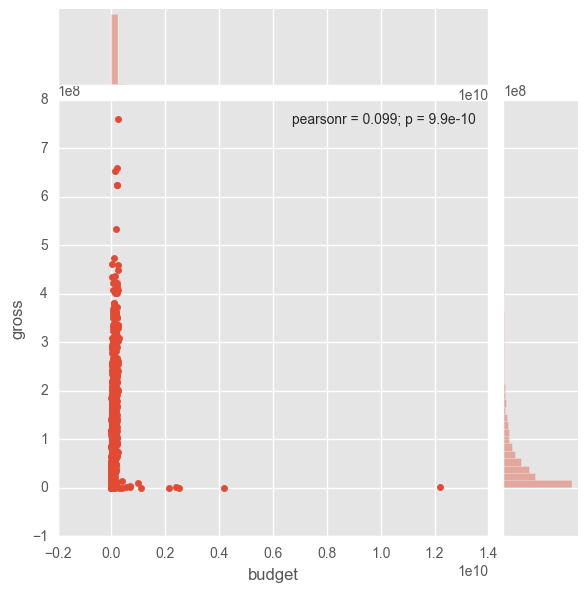

In [160]:
sns.jointplot(data=films, x='budget', y='gross')

На графике очень отчетливо показано, что секрет большой прибыли фильма совсем не в размере бюджета, затраченного на съемки и гонорары актеров, несколько точек, демонстрирующих высокие значения по оси "Бюджет" не отличаются высокими кассовыми сборами, более того, при одном и том же размере бюджета значения прибыли очень разные. Еще один вывод, который можем сделать, посмотрев на данный график:в основном бюджет крупных фильмов почти одинаков-большинство точек по координате "Бюджет" сконцентрировано в одной области.То есть с легкостью можно предсказать, во сколько вам может обойтись Оскар.

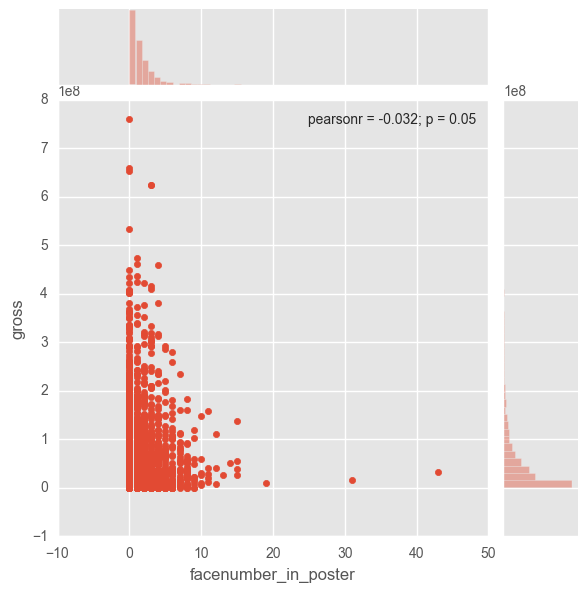

In [154]:
sns.jointplot(data=films, x='facenumber_in_poster', y='gross')

Как ни странно, получается, что как только люди видят знакомое или некрасивое лицо на постере нового фильма, фильм либо перестает быть новым, либо перестает быть притягательным, чем абстрактнее афиша, тем загадочней сюжет.

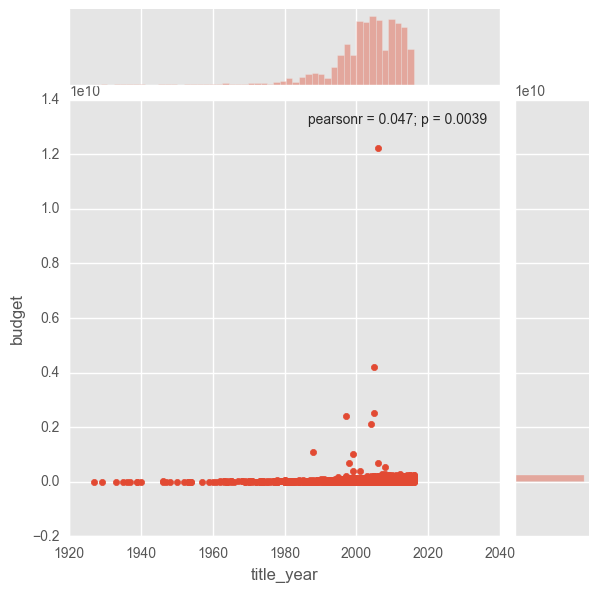

In [161]:
sns.jointplot(data=films, x='title_year', y='budget')

С одной стороны, совокупный бюджет за 100 лет вырос(еще бы, инфляция, другой мир, другие люди).С другой стороны, неожиданно что самые выдающиеся по издержкам фильмы были сняты не в последние годы, получается, кризис подкосил кинопроизводство.

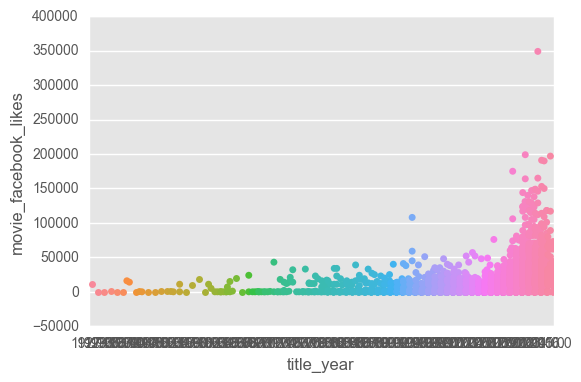

In [163]:
_ = sns.swarmplot(data=films, x='title_year', y='movie_facebook_likes')
_ = plt.xlabel('title_year')
_ = plt.ylabel('movie_facebook_likes')

Наибольшее количество лайков в интернете набирают фильмы снятые в последние годы. Кино, которое снималось 100 лет назад-не очень популярно среди публики. Вполне ожидаемо, но все же немного обидно, целая история уходит в прошлое.

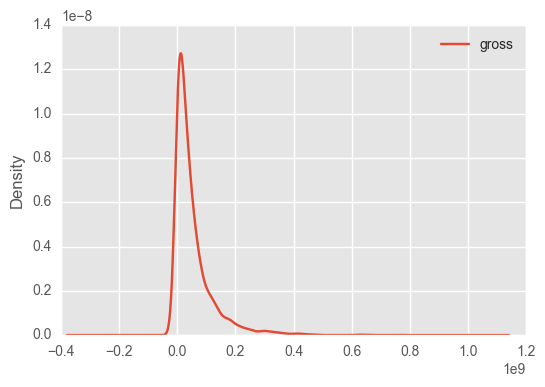

In [187]:
films.plot(x='budget', y='gross', kind='density')

Данный график демонстрирует плотность распределения прибыли при разных значениях бюджета. Прибыль резкосконцентрирована, имеет единственный максимум около 1,3, вершина острая, это значит, что отклонения очень слабые.

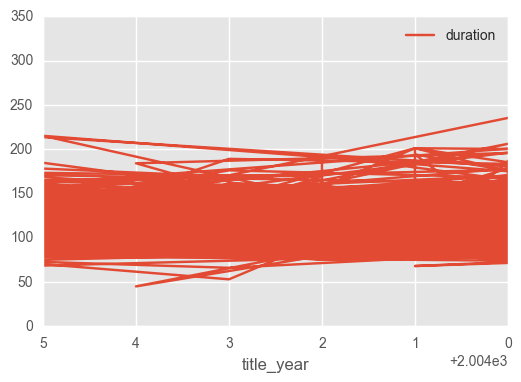

In [188]:
films.plot(x='title_year', y='duration', kind='line')

Вам может показаться, что эта картинка ужасно некрасива. Однако она, несмотря на отсутствие эстетичности, демонстрирует отсутствие всякой линейной связи между длительностью фильмов и годом их создания. Во многом это результат того, что к каждому году относятся фильмы с самой разной продолжительностью.

In [182]:
from pandas.tools.plotting import radviz

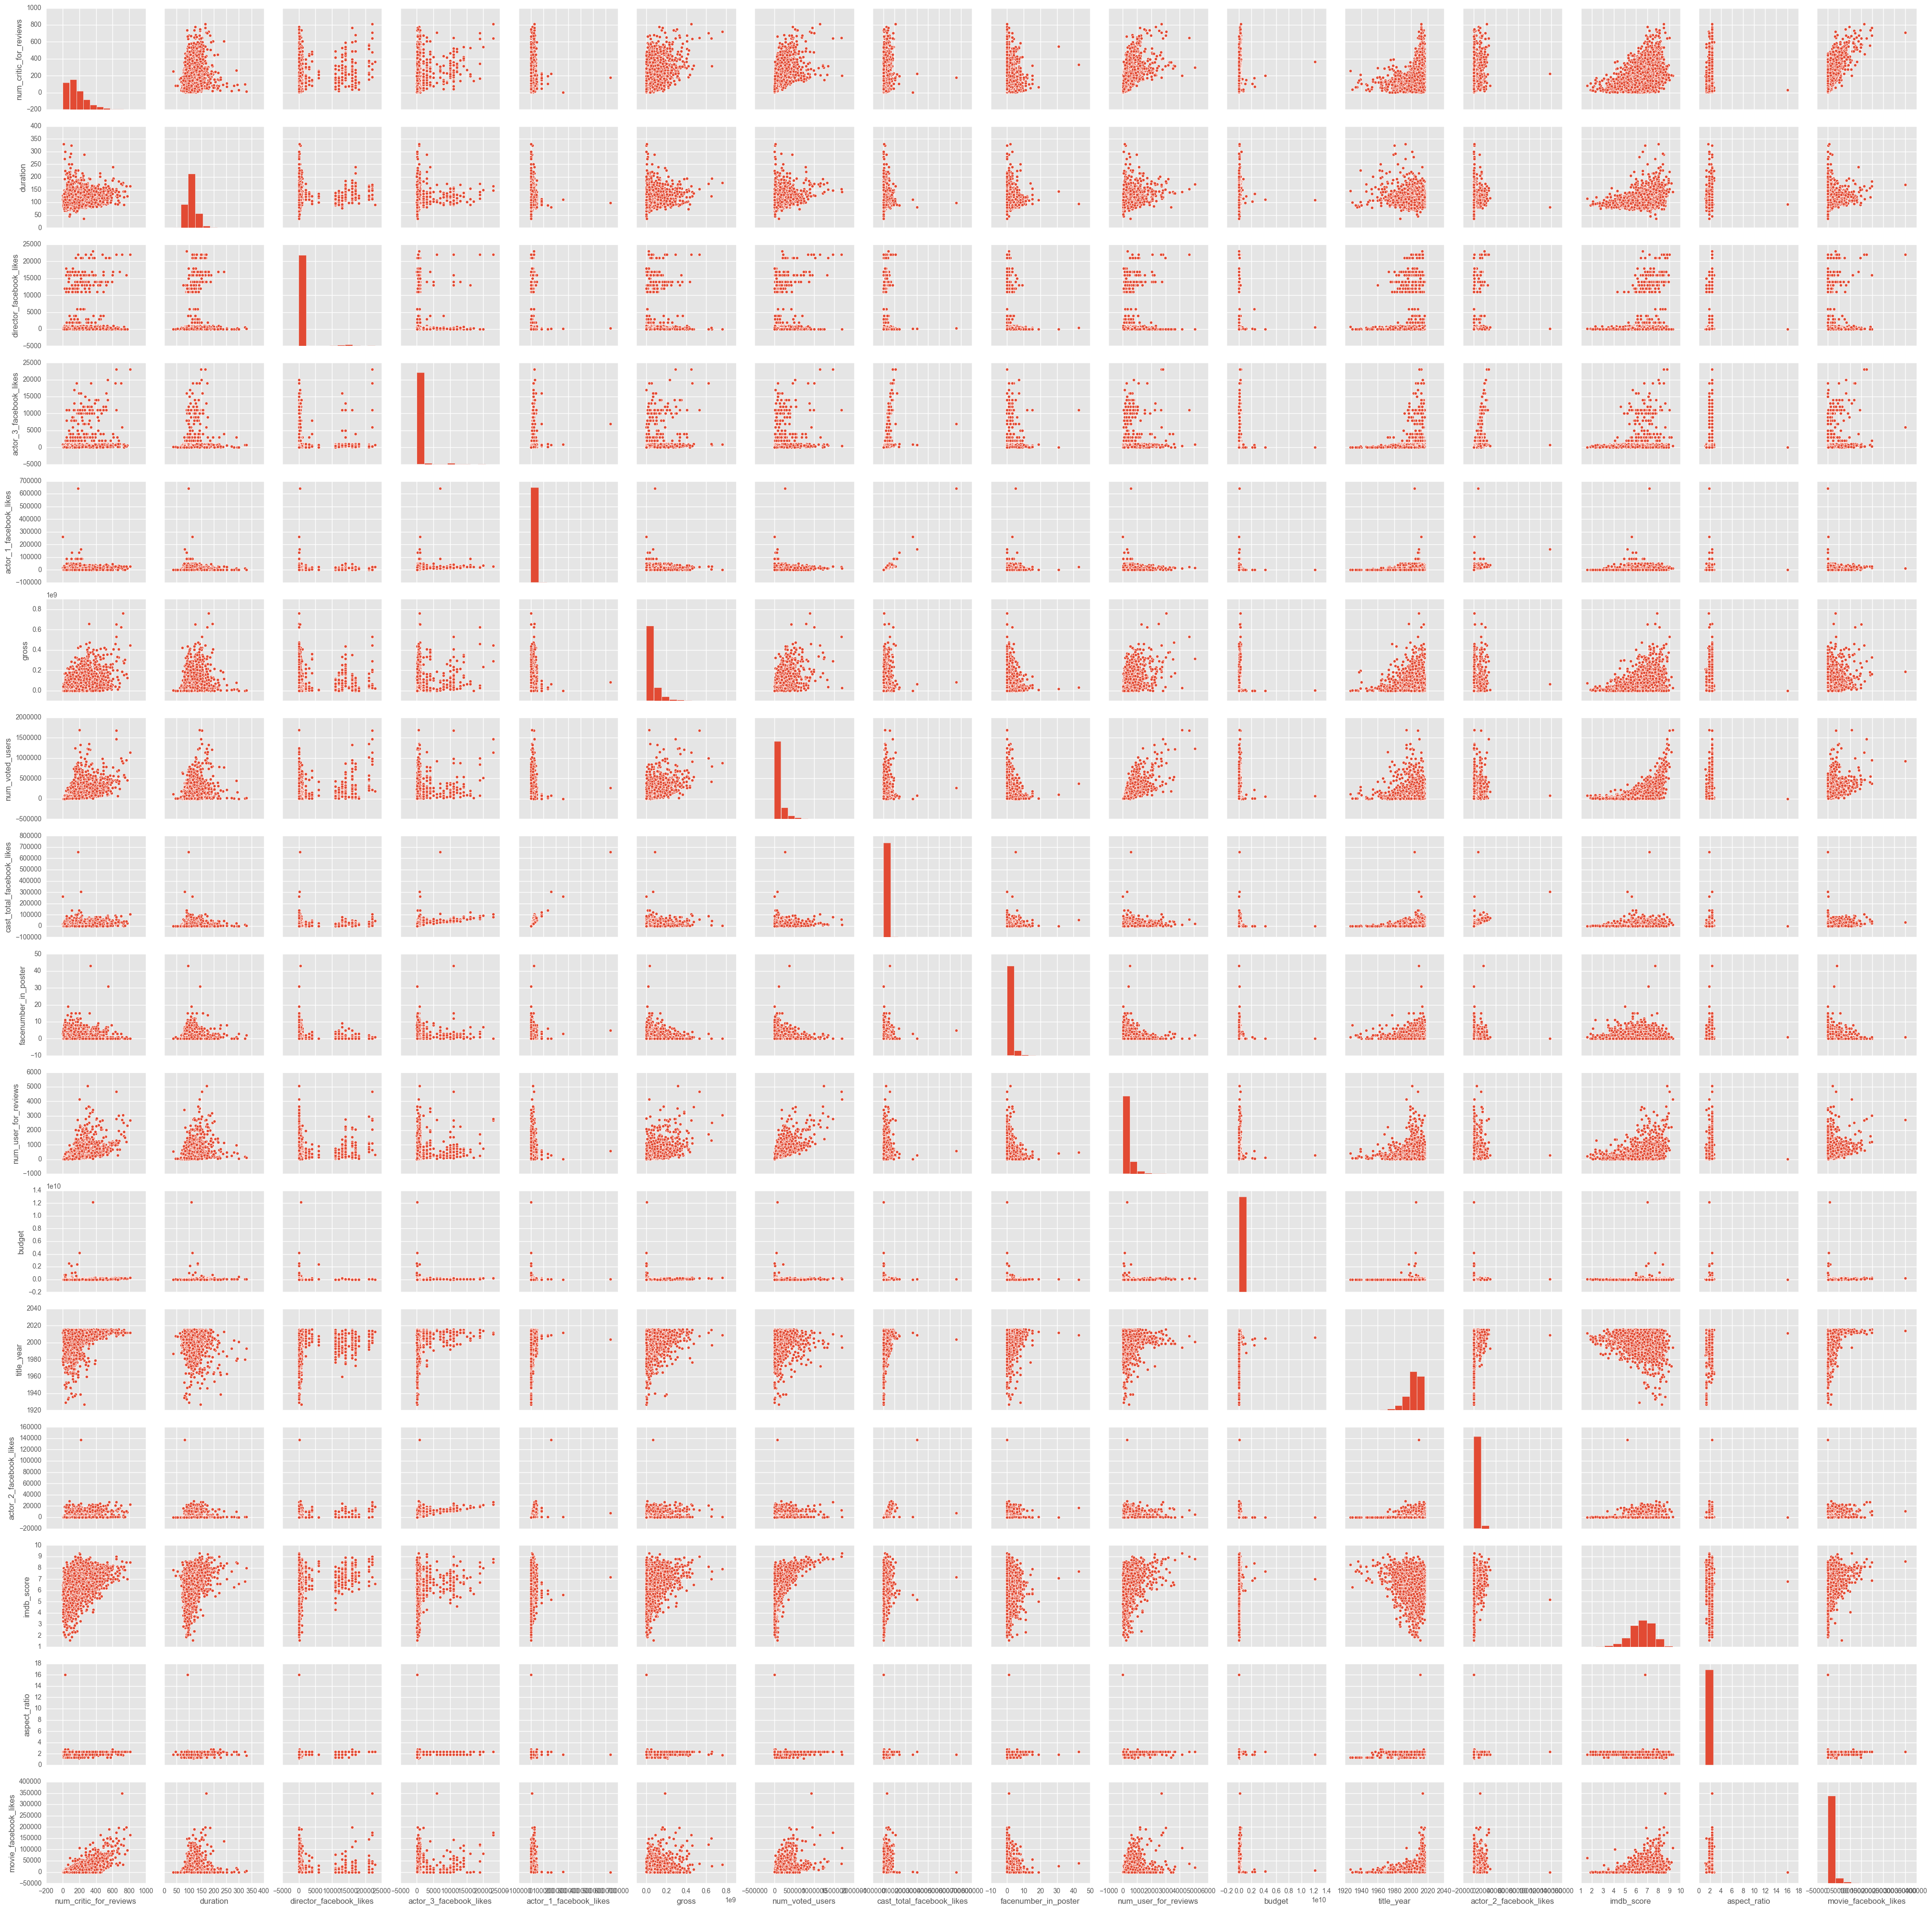

In [186]:
sns.pairplot(films)

Этот потрясающий график можно применить на любую выборку данных из датасета. И он покажет корреляцию или ее отсутствие. Гистограмма в каждой строке покажет распределение значений какой-либо из переменных. Остальные графики в этой строке покажут корреляцию с этой переменной.Я понимаю, что данный график нечитабелен в числовом смысле, однако уже по направлению массы точек можно сделать предварительные выводы о корреляции.Хотелось показать восторг и масштабы явления:)

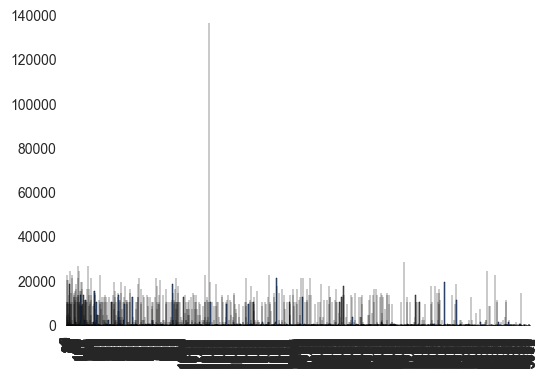

In [144]:
films['actor_2_facebook_likes'].plot(kind='bar')

Данный график показывает в принципе все возможные количества лайков, которых смог добиться в интернете актер. В основном все "вторые"(как неуважительно, в конце концов) актеры набирают в сети фейсбук не больше 20 000 лайков(причем по количеству столбцов можно выделить подкластеры вторых актеров, первая группа, набирающая около 2 000 лайков, вторая группа, количество лайков в которое колеблетя в окрестности 10 000, и третья-самая немногочисленная-набирает около 20 000),однако можно заметить отдельные результаты 3 000 и 14 000 лайков.

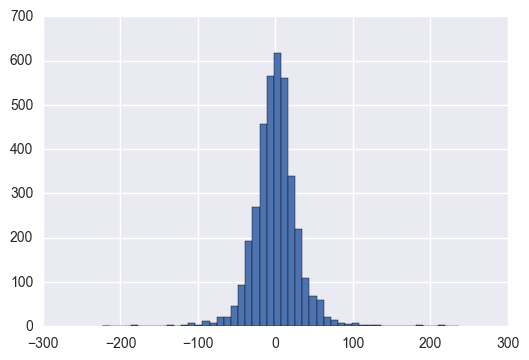

In [141]:
plt.figure()
films['duration'].diff().hist(bins=50)

Это гистограмма длительности фильмов. Понимаем, что так или иначе, существует определенный "формат" длительности.

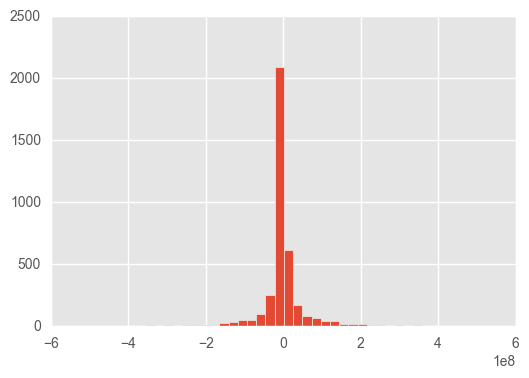

In [173]:
plt.figure()
films['gross'].diff().hist(bins=50)

In [ ]:
Это гистограмма валовой прибыли. 

**Задача №2(Симуляционная)**

**Пункт 1**

Зададим равномерное распределение

In [3]:
X = stats.uniform(loc=0, scale=1)

Попробуем сгенерировать случайное число в промежутке $(0, 1)$

In [7]:
x = X.rvs(1)

In [8]:
x

array([ 0.46234167])

Для того, чтобы результат был удобен для анализа и наболее близок к равномерному распределению, будем генерировать 100000 чисел. Начнем с величины x1.

In [12]:
x1 = X.rvs(100000)
Fx1 = X.cdf(x1)

Построим график распределения данной случайной величины.

In [16]:
x_values = x1
y_values = Fx1

/Users/Tatyana/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


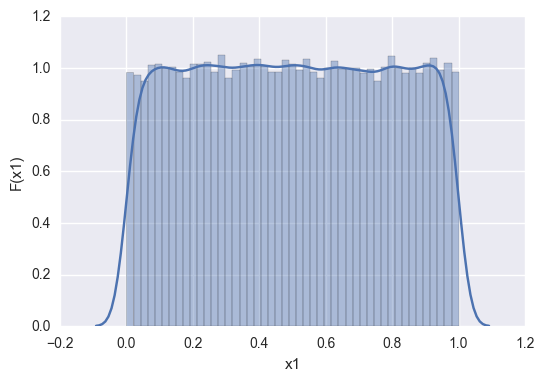

In [17]:
sns.distplot(y_values)
plt.xlabel("x1")
plt.ylabel("F(x1)")

Равномерное распределение неустойчиво относительно суммирования, поэтому для того, чтобы получить распределение суммарной величины $(X1+X2+X3)$, сгенерируем дополнительные случайные величины.

In [20]:
x2 = X.rvs(100000)
Fx2 = X.cdf(x2)

In [21]:
x3 = X.rvs(100000)
Fx3 = X.cdf(x3)

In [62]:
s = x1 + x2 + x3
Fs = X.cdf(s)

In [59]:
x_values = s
y_values = X.cdf(x_values)

/Users/Tatyana/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


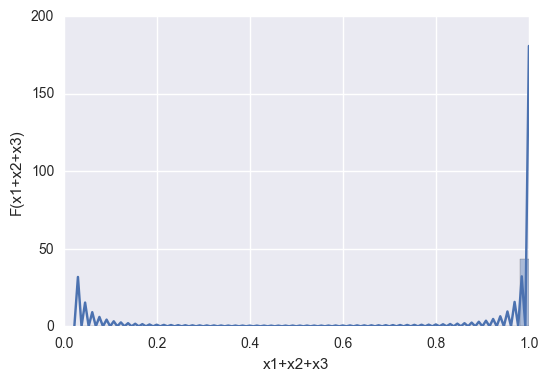

In [60]:
sns.distplot(y_values)
plt.xlabel("x1+x2+x3")
plt.ylabel("F(x1+x2+x3)")

Посчитаем сумму 10 случайных равномерно распределенных случайных величин

In [52]:
summa10 = 0
for i in range(1, 11):
    xi = X.rvs(100000)
    summa10 += xi
    i += 1

In [53]:
summa10

array([ 3.88362269,  3.21053391,  4.27764234, ...,  5.51430631,
        5.41239559,  5.50992117])

In [54]:
x_values = summa10
y_values = X.cdf(x_values)

/Users/Tatyana/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


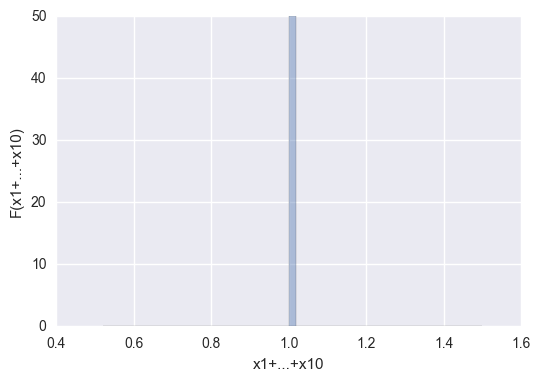

In [55]:
sns.distplot(y_values)
plt.xlabel("x1+...+x10")
plt.ylabel("F(x1+...+x10)")

Посчитаем сумму $50 X_i$

In [37]:
summa50 = 0
for i in range(1, 51):
    xi = X.rvs(100000)
    summa50 += xi
    i += 1

In [38]:
summa50

array([ 22.77327928,  25.79691095,  26.77776461, ...,  27.24092458,
        26.26058021,  28.33155806])

/Users/Tatyana/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


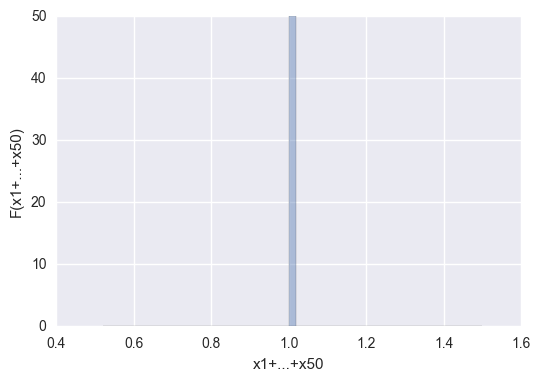

In [56]:
x_values = summa50
y_values = X.cdf(x_values)
sns.distplot(y_values)
plt.xlabel("x1+...+x50")
plt.ylabel("F(x1+...+x50)")

**Пункт 2**

$P(x1 + x2 + x3 > 2) = 1 - P(x1 + x2 + x3 < 2) = 1 - (x1 + x2 + x3).cdf(2)$

In [95]:
(S).cdf(2)

AttributeError: 'numpy.ndarray' object has no attribute 'cdf'

Я не понимаю, почему вот так у меня ничего не плучается, поэтому попробовала так:

In [94]:
np.sum(S)/(len(S))

1.5011766741896109

**Пункт 3**

In [74]:
np.mean(x1 ** 5)

0.166910879215492

In [78]:
np.var(x1 / 1 + x2 **2)

0.17173275711316233

**Пункт 4 **

In [81]:
N = (1 + x1)/(3 + x2)

Найдем квантиль уровня $0,25$

In [92]:
np.percentile(N, 25)

0.35735966730392177

Найдем медиану. Это частный случай нахождения квантили уровня $0,5$

In [93]:
np.percentile(N, 50)

0.42893186856474019

**Задача №3**

Задача собирателя наклеек. Coupon collector’s problem. Производитель чудо-юдо-йогуртов наклеивает на каждую упаковку
одну из 50 случайно выбираемых наклеек. Покупатель собравший все виды наклеек получает приз от производителя. Пусть X — это количество упаковок йогурта, которое нужно купить, чтобы собрать все наклейки.
Найдите E(X), Var(X)

**Решение:**

Вероятность того, что в первый раз купив йогурт, мы найдем одну из наклеек равна 1. Зато если мы предположим, что 49 наклеек уже собраны, то потребуется в среднем 50 попыток, чтобы найти самую последнюю. Но на следующих наших шагах вероятность получить новую наклейку будет уже другой $p_i = (n − (i − 1))/n$. Распределение данной случайной величины по смыслу напоминает распределение первого успеха в n испытаниях-геометрическое распределение. Математическое ожидание для величины, имеющей геометрическое распределение - $1/p_i = n/(n − (i − 1))$. Воспользуемся линейностью матожидания и независимостью величин, просуммируем матожидание по вероятноти найти каждую следующую наклейку. Получим E = $n/n + n/(n-1) + ... + n = n(1/n + 1/(n-1) + ... + 1)$. Если в обратном порядке перечислить числа, которые стоят в скобках, получается частичная сумма гармонического ряда $1/n$. А теперь, если покопаться в интернете, там написано, что та самая частичная сумма гармонического ряда-это гармоническое число, которое асимптотически раскладывается по формуле. Математическое ожидание числа попыток для сбора n разных наклеек по одному разу растет как $О(n*log(n))$ Но мне стало стыдно, и я поступила, как поступали танкисты, и посчитала, что для получения 50 наклеек нужно купить 225 йогуртов.

Теперь посчитаем дисперсию, она будет суммой дисперсий независимых величин, определяемых, в свою очередь, в соответствии со свойсвом геометрического распределения как $(1-p_i)/(p_i)^2$ или в терминах n : $n^2/n^2 + n^2/(n-1)^2 + ... + n^2)$. Вынесем за скобку $n^2$ и получим приблизительно $1,6 * 2500 = 4000$. Когда я считала матожидание, я подумала, что у меня есть шанс, но после подсчета дисперсии мои сомнения отпали!